<a href="https://colab.research.google.com/github/yohanesnuwara/pyreservoir/blob/master/notebooks/reservoir_pressure_analytical_solution_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reservoir Pressure Analytical Solution (John W. Lee's Approximation)

This notebook solves for pressure distribution in the reservoir (across some radial distance from the centre of wellbore) due to wellbore production, using an approximation method proposed by John W. Lee. 

Find Chapter 6-4 (Constant Rate Solutions, Infinite Reservoir with Line-Source Well) in Brian F. Towler's book. This solution is used for the assumption of NO FLOW B.C. at outer boundary and INFINITE-ACTING flow conditions (means reservoir is very large).

In [1]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 191, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 849 (delta 99), reused 0 (delta 0), pack-reused 658
Receiving objects: 100% (849/849), 24.04 MiB | 16.72 MiB/s, done.
Resolving deltas: 100% (453/453), done.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("/content/pyreservoir/fluid_flow")
from flow_solutions import *

plt.style.use("dark_background")

Example given here is taken from Example 6-3 of Brian F. Towler's book.

Given the following reservoir conditions:

* Porosity 17.5%
* Permeability 0.12 micro-m2
* Oil viscosity 2.5 cp
* Wellbore radius 8 cm
* Reservoir extent 1,000 m
* Initial reservoir pressure 7,900 kPa
* Total compressibility 2x10^-6 kPa^-1
* Wellbore flowing rate 40 m3/day
* Oil FVF 1.405 RB/STB



First, calculate the pressure at a point located 1 m away from wellbore after 24 hours. 

In [9]:
# known

poro = 0.175
k = 0.12 # in micro.m2
h = 10 # in m
mu_oil = 2.5 # in cP
rw = 8 # in cm 
pi = 7900 # in kPa
re = 1000 # in m
ct = 2E-06 # in kPa^-1
q = 40 # in std m3/d
Bo = 1.405 # in res m3/std m3

# conversion

k = k / 9.869233E-4 # 1 mD = 9.869233E-4 micro.m2
h = h / 3.048E-01 # 1 m = 3.048E-01 ft 
rw = rw / (1E+02 * 3.048E-01) # from cm to ft
pi = pi / 6.894757 # 1 psi = 6.894757 kPa
re = re / 3.048E-01 # 1 m = 3.048E-01 ft 
ct = ct / (1 / 6.894757) # from kPa^-1 to psi^-1
q = q / (1.589873E-01) # from m3 to barrel 

time, distance = 24, 1*3.281-rw
print("Time                   : {} hours".format(time))
print("Distance from wellbore : {:.2f} ft".format(distance))

t_finite_acting = time_finite_acting(re, rw, poro, mu_oil, ct, k)
td, Pd, Pwf = constant_terminal_rate(time, distance, re, rw, pi, q, poro, ct, k, h, mu_oil, Bo)

print("Finite acting time     : {:.2f} hours \n".format(t_finite_acting))
print("Calculation result at time {} hour and radius {:.2f} ft from wellbore \n".format(time, distance))
print("Wellbore flowing pressure (pwf)  : {:.2f} psia".format(Pwf))
print("Dimensionless time               : {:.2f}".format(td))
print("Dimensionless pressure           : {:.2f}".format(Pd))

Time                   : 24 hours
Distance from wellbore : 3.02 ft
Finite acting time     : 506.32 hours 

Calculation result at time 24 hour and radius 3.02 ft from wellbore 

Wellbore flowing pressure (pwf)  : 986.48 psia
Dimensionless time               : 11817.49
Dimensionless pressure           : 5.09


The finite acting time is 506 hours, means that until 24 hours flow is INFINITE-ACTING. Therefore, this method is still VALID. 



Plot pressure distribution from 0 to 5 days (120 hours) at distance from 0 to 1 km away from the wellbore.

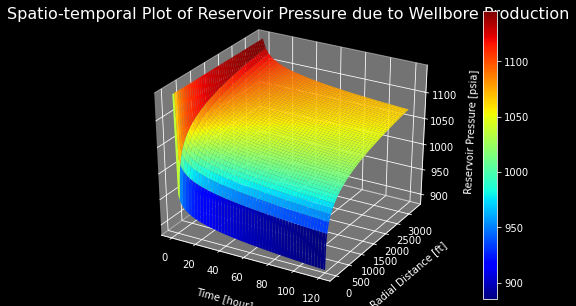

In [8]:
12time = np.linspace(0*24, 5*24, 100)

# r = np.arange(1, 1001, 1)
r = np.linspace(1, 1000, 100)

r = r * 3.281 # convert distance from m to ft
distance = [i-rw for i in r]

# Solve for Pwf
M, N = len(time), len(distance)
Pwf = np.empty((M, N))

for i in range(len(time)):
  for j in range(len(distance)):
    Pwf[i,j] = constant_terminal_rate(i, j, re, rw, pi, q, poro, ct, k, h, mu_oil, Bo)[2]

# Plot solution
from mpl_toolkits.mplot3d import Axes3D

tt, rr = np.meshgrid(time, r)
fig = plt.figure()  #adjust 3D Figure
ax = Axes3D(fig)
ax.plot_surface(tt,rr,Pwf.T, cmap="jet", linewidth=0)

ax.set_title('Spatio-temporal Plot of Reservoir Pressure due to Wellbore Production', size=16, pad=15)
ax.set_xlabel('Time [hour]', labelpad=10)
ax.set_ylabel('Radial Distance [ft]', labelpad=10)
ax.set_zlabel('Reservoir Pressure [psia]', labelpad=10)

# Colorbar handler
import matplotlib.cm as cm
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(Pwf)
plt.colorbar(m)

plt.show()